In [1]:
print("Sql basic quries for data analysis")

Sql basic quries for data analysis


In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sbn
import psycopg2

db=psycopg2.connect(
    host='localhost',
    user='postgres',
    password='password',
    database='ecommerce1'
)

cur=db.cursor()

# 1. List all unique cities where customers are located.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
qury="""select distinct(customer_city) from customers"""
cur.execute(qury)
data=cur.fetchall()
df.head()

,0
0,bom jardim de minas
1,alto rio doce
2,alvorada do gurgueia
3,batatais
4,capao da porteira


# 2. Count the number of orders placed in 2017.

In [9]:
db.rollback()  # Rollback the failed transaction
querry="""select count(order_id)
from orders 
WHERE EXTRACT(YEAR FROM order_purchase_timestamp::timestamp) = 2017"""
cur.execute(querry)
data=cur.fetchall()
print(data[0][0])

45101


# 3. Find the total sales per category.

In [10]:
db.rollback()  # Rollback the failed transaction
querry = """
    SELECT products.product_category AS category, 
           ROUND(SUM(payments.payment_value)::numeric, 2) AS sales
    FROM products
    JOIN order_items ON products.product_id = order_items.product_id
    JOIN payments ON payments.order_id = order_items.order_id
    GROUP BY category
"""
cur.execute(querry)
data=cur.fetchall()
df=pd.DataFrame(data, columns=["category", "sales"])
print(df)

                     category       sales
0   Agro Industria e Comercio   118730.61
1                         Art    30992.93
2             Arts and Crafts     2326.17
3                       audio    60324.62
4                  automotive   852294.33
..                        ...         ...
69            technical books    24915.44
70                  telephony   486882.05
71                       toys   619037.69
72            Watches present  1429216.68
73                       None   252801.71

[74 rows x 2 columns]


# 4. Calculate the percentage of orders that were paid in installments.

In [11]:
db.rollback()  # Rollback the failed transaction
querry = """
    SELECT (SUM(CASE WHEN payment_installments >= 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS percentage
    FROM payments
"""
cur.execute(querry)
data=cur.fetchall()
print("the percentage of orders were paid on installments:", data)

the percentage of orders were paid on installments: [(Decimal('99.9980748127755424'),)]


# 5. Count the number of customers from each state. 

you data frame is below
   State  Cutomer_Count
0     RS           5466
1     SC           3637
2     DF           2140
3     MG          11635
4     RN            485
5     SP          41746
6     GO           2020
7     AM            148
8     PA            975
9     PB            536
10    PE           1652
11    AP             68
12    ES           2033
13    TO            280
14    MT            907
15    RR             46
16    PI            495
17    PR           5045
18    CE           1336
19    BA           3380
20    AC             81
21    RJ          12852
22    MA            747
23    AL            413
24    RO            253
25    SE            350
26    MS            715


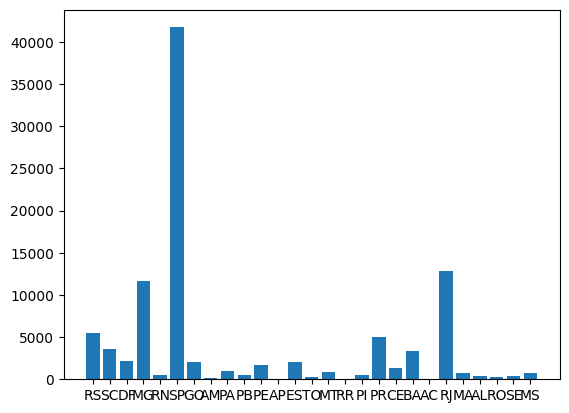

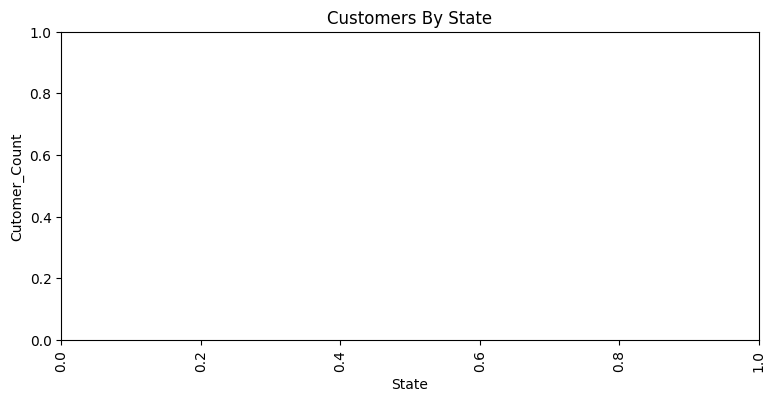

In [13]:
import matplotlib.pyplot as plt
db.rollback()  # Rollback the failed transaction
query = """
    SELECT customer_state, COUNT(customer_id)
    FROM customers
    GROUP BY customer_state
"""
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data, columns=["State", "Cutomer_Count"])
# print(data)
print("you data frame is below")
print(df)
plt.bar(df["State"], df["Cutomer_Count"])
df=df.sort_values(by="Cutomer_Count", ascending=False)
plt.figure(figsize=(9,4))
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Cutomer_Count")
plt.title("Customers By State")
plt.show()

# 1. Calculate the number of orders per month in 2018.

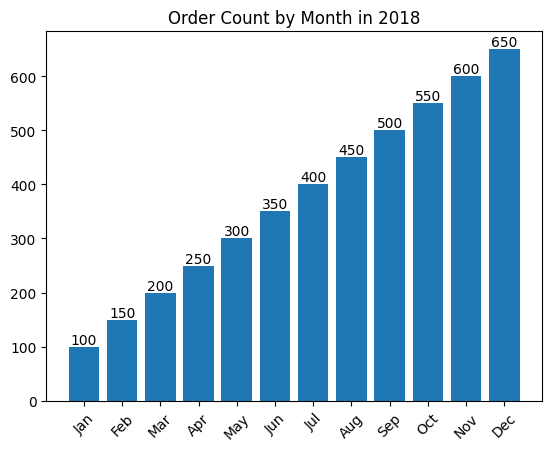

In [29]:
import matplotlib.pyplot as plt

# Sample data for the bar chart
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
order_count = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650]

# Create the bar chart
fig, ax = plt.subplots()  # Define fig and ax
ax.bar(months, order_count)

# Add title and rotate x-axis labels for readability
plt.title("Order Count by Month in 2018")
plt.xticks(rotation=45)

# Add labels to bars
ax.bar_label(ax.containers[0])

# Show the plot
plt.show()


# 2. Find the average number of products per order, grouped by customer city.

          Customer_City Avg_Order
0   bom jardim de minas      1.38
1         alto rio doce      1.00
2  alvorada do gurgueia      1.00
3              batatais      1.11
4     capao da porteira      1.00
5                 icatu      1.00
6                osorio      1.17
7              populina      2.00
8            novo mundo      1.00
9                tururu      1.00


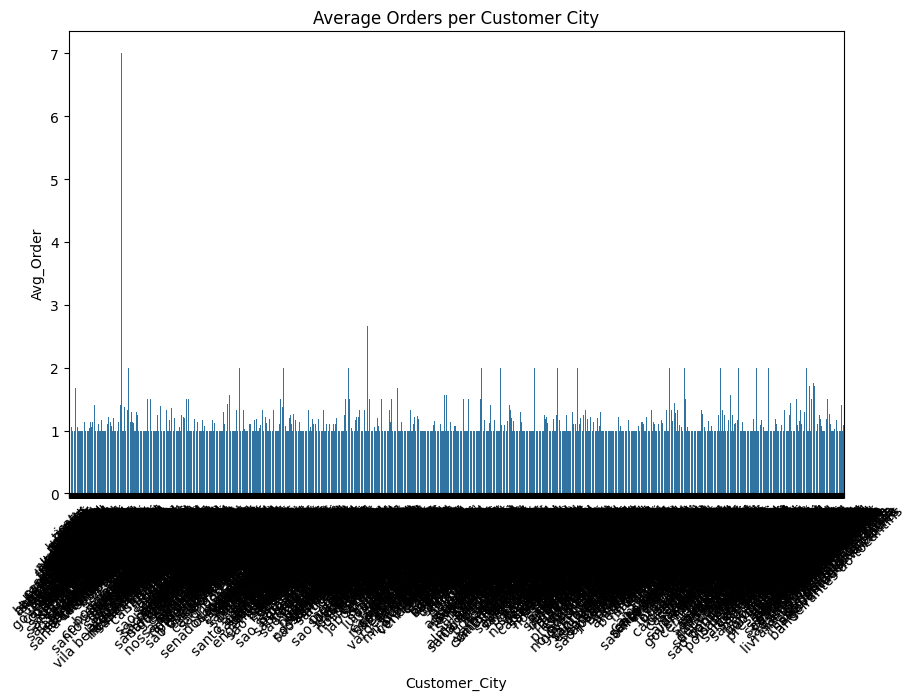

In [32]:
try:
    # Rollback in case any previous transaction failed
    cur.execute("ROLLBACK")
    
    # Your SQL query
    query = """
    WITH count_per_order AS (
        SELECT orders.order_id, orders.customer_id, COUNT(order_items.order_id) AS oc
        FROM orders 
        JOIN order_items ON orders.order_id = order_items.order_id
        GROUP BY orders.order_id, orders.customer_id
    )
    SELECT customers.customer_city, ROUND(AVG(count_per_order.oc), 2) AS average_order
    FROM customers 
    JOIN count_per_order ON customers.customer_id = count_per_order.customer_id
    GROUP BY customers.customer_city;
    """
    
    cur.execute(query)  # Execute the query
    data = cur.fetchall()  # Fetch all the results

    # Create a pandas DataFrame
    df = pd.DataFrame(data, columns=["Customer_City", "Avg_Order"])

    # Check the first 10 rows
    print(df.head(10))

    # Optional: plot using seaborn
    plt.figure(figsize=(10,6))
    sbn.barplot(x="Customer_City", y="Avg_Order", data=df)
    plt.title("Average Orders per Customer City")
    plt.xticks(rotation=45)
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
